## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [105]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

import warnings

#### Import the CSV Data as Pandas DataFrame

In [106]:
df = pd.read_csv('data.csv')

#### Show Top 5 Records

In [107]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,7800.0,2,1.00,780,16344,1.0,0,0,1,780,0,1942,0,4229 S 144th St,Tukwila,WA 98168,USA
1,80000.0,1,0.75,430,5050,1.0,0,0,2,430,0,1912,0,32215 E Rutherford St,Carnation,WA 98014,USA
2,83000.0,2,1.00,900,8580,1.0,0,0,3,900,0,1918,0,14440 51st Ave S,Tukwila,WA 98168,USA
3,83300.0,3,2.00,1490,7770,1.0,0,0,4,1490,0,1990,0,26017 189th Ave SE,Covington,WA 98042,USA
4,83300.0,3,2.00,1370,78408,1.0,0,0,5,1370,0,1964,0,24007 196th Ave SE,Covington,WA 98042,USA


#### Preparing X and Y variables

In [108]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement']]

In [109]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,2,1.00,780,16344,1.0,0,0,1,780,0
1,1,0.75,430,5050,1.0,0,0,2,430,0
2,2,1.00,900,8580,1.0,0,0,3,900,0
3,3,2.00,1490,7770,1.0,0,0,4,1490,0
4,3,2.00,1370,78408,1.0,0,0,5,1370,0


In [110]:
print("Categories in 'street' variable:     ",end=" " )
print(df['street'].unique())

print("Categories in 'city' variable:  ",end=" ")
print(df['city'].unique())

print("Categories in'statezip' variable:",end=" " )
print(df[ 'statezip'].unique())

print("Categories in 'country' variable:     ",end=" " )
print(df['country'].unique())


Categories in 'street' variable:      ['4229 S 144th St' '32215 E Rutherford St' '14440 51st Ave S' ...
 '5044 Butterworth Rd' '4442 95th Ave NE' '5426 40th Ave W']
Categories in 'city' variable:   ['Tukwila' 'Carnation' 'Covington' 'Yarrow Point' 'Auburn' 'Kirkland'
 'Seattle' 'Algona' 'Renton' 'Burien' 'Kent' 'Enumclaw' 'Maple Valley'
 'SeaTac' 'Duvall' 'Federal Way' 'Skykomish' 'Des Moines' 'Vashon'
 'Redmond' 'Pacific' 'Shoreline' 'Medina' 'Normandy Park' 'Issaquah'
 'Black Diamond' 'Ravensdale' 'Snoqualmie' 'Sammamish' 'Kenmore'
 'North Bend' 'Bellevue' 'Woodinville' 'Milton' 'Lake Forest Park'
 'Fall City' 'Newcastle' 'Bothell' 'Inglewood-Finn Hill' 'Mercer Island'
 'Preston' 'Snoqualmie Pass' 'Beaux Arts Village' 'Clyde Hill']
Categories in'statezip' variable: ['WA 98168' 'WA 98014' 'WA 98042' 'WA 98004' 'WA 98002' 'WA 98034'
 'WA 98178' 'WA 98001' 'WA 98057' 'WA 98166' 'WA 98032' 'WA 98106'
 'WA 98022' 'WA 98038' 'WA 98188' 'WA 98019' 'WA 98023' 'WA 98056'
 'WA 98055' 'WA 98030

In [111]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)


In [112]:
X = preprocessor.fit_transform(X)

In [113]:
X


array([[-1.54185513, -1.48780567, -1.41506306, ..., -3.62789634,
        -1.21999422, -0.67152025],
       [-2.64734533, -1.80982621, -1.78123106, ..., -2.14665726,
        -1.6296385 , -0.67152025],
       [-1.54185513, -1.48780567, -1.28951975, ..., -0.66541817,
        -1.07954476, -0.67152025],
       ...,
       [ 1.77461548,  5.91866676,  7.85421821, ..., -0.66541817,
         3.50847114,  9.76217643],
       [ 1.77461548,  3.02048189,  8.27269592, ..., -0.66541817,
         6.85585008,  4.43709472],
       [-0.43636492,  0.44431757,  0.06007087, ..., -0.66541817,
        -0.31877682,  0.71386686]])

In [104]:
y = df['price']

In [114]:
y

0           7800.0
1          80000.0
2          83000.0
3          83300.0
4          83300.0
           ...    
4545     3800000.0
4546     4489000.0
4547     4668000.0
4548     7062500.0
4549    12899000.0
Name: price, Length: 4550, dtype: float64

In [115]:
X.shape

(4550, 10)

In [116]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3640, 10), (910, 10))

#### Create an Evaluate Function to give all metrics after model Training

In [142]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [143]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}
model_list = []
r2_list =[]
y_test_pred_stack = np.empty((len(X_test), 0))  # 2D array to store stacked y_test_pred values
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Stack y_test_pred values
     # Stack y_test_pred values in a new column
    y_test_pred_stack = np.hstack((y_test_pred_stack, y_test_pred[:, np.newaxis]))
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 514716.2744
- Mean Absolute Error: 169603.7960
- R2 Score: 0.3049
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 263460.0019
- Mean Absolute Error: 175449.2117
- R2 Score: 0.5032


Lasso
Model performance for Training set
- Root Mean Squared Error: 514852.0240
- Mean Absolute Error: 170018.3858
- R2 Score: 0.3046
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 261664.2110
- Mean Absolute Error: 174406.6821
- R2 Score: 0.5100


Ridge
Model performance for Training set
- Root Mean Squared Error: 514716.2744
- Mean Absolute Error: 169603.7867
- R2 Score: 0.3049
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 263459.8291
- Mean Absolute Error: 175449.2181
- R2 Score: 0.5032


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 479390.5109
- Mean 

c:\Users\Mohit\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.649e+13, tolerance: 2.775e+10
  model = cd_fast.enet_coordinate_descent(


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 255904.9433
- Mean Absolute Error: 74882.5351
- R2 Score: 0.8282
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 324200.6568
- Mean Absolute Error: 190011.6758
- R2 Score: 0.2477




### Results

In [144]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,0.509959
2,Ridge,0.503210
0,Linear Regression,0.503209
4,Random Forest Regressor,0.247733
3,K-Neighbors Regressor,0.179401


In [148]:
y_test_pred_stack.shape

(182, 5)

In [149]:
X=y_test_pred_stack
y=y_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [152]:
best_score =-pow(10,100)
best_model = None

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
     
     # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
  
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    if model_test_r2 > best_score:
        best_score = model_test_r2
        best_model =model
        modelname=str(model)


final_predictions = best_model.predict(X_test)
print(modelname)
mse = mean_squared_error(y_test, final_predictions)
mae = mean_absolute_error(y_test, final_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predictions)


print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

LinearRegression()
Mean Squared Error (MSE): 102716951873.1997
Root Mean Squared Error (RMSE): 320494.85467507853
Mean Absolute Error (MAE): 194355.62449746628
R-squared (R2): 0.5750637835628728


c:\Users\Mohit\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.157e+12, tolerance: 1.552e+09
  model = cd_fast.enet_coordinate_descent(


#### Inititally the rsquared value of the model was below 0.5 but after stacking the best possible model we increased it to around 0.6
    Model Name	                  R2_Score
1	Lasso	                  0.509959
2	Ridge	                  0.503210
0	Linear Regression	      0.503209
4	Random Forest Regressor	  0.247733
3	K-Neighbors Regressor	  0.179401
After stacking it with the best model possible i.e Linear Regresion we got the R-squared (R2) value close to 0.5750637835628728

## Linear Regression

In [153]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = best_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 57.51


## Plot y_pred and y_test

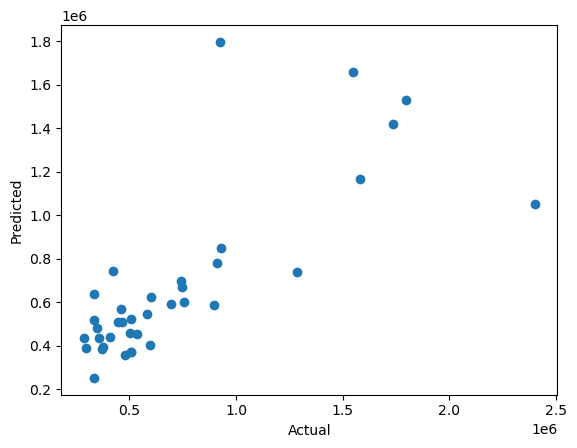

In [154]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

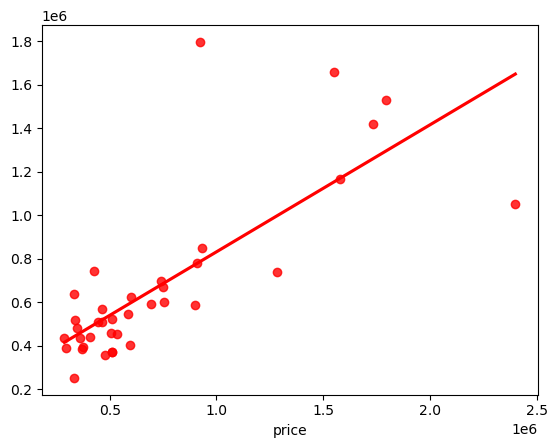

In [155]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [156]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1926,425000.0,7.454294e+05,-3.204294e+05
2569,505000.0,4.578809e+05,4.711912e+04
2596,510000.0,3.731009e+05,1.368991e+05
3712,740000.0,6.962350e+05,4.376499e+04
4448,1580000.0,1.164977e+06,4.150230e+05
2594,510000.0,3.721058e+05,1.378942e+05
1815,409316.0,4.425210e+05,-3.320498e+04
4129,930000.0,8.474685e+05,8.253146e+04
4527,2400000.0,1.051469e+06,1.348531e+06
859,295000.0,3.894695e+05,-9.446955e+04
